In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

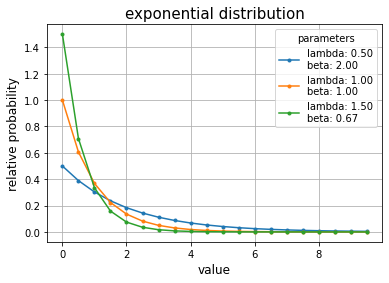

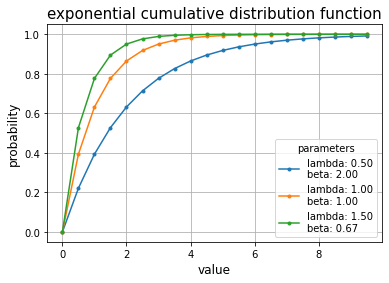

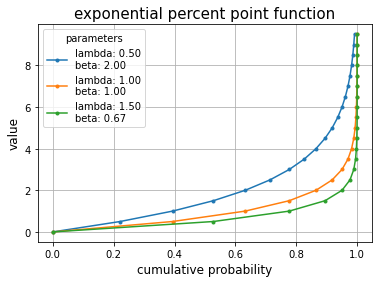

In [2]:
# exponential distribution - example list
lambda_list = [0.5, 1.0, 1.5]

delta_x = 0.5
x_range = np.arange(0.0, 10.0, delta_x)

for lambda_val in lambda_list:
    p_list = []
    beta = 1 / lambda_val
    for x in x_range:
        p = (lambda_val * (math.exp(-lambda_val * x)))
        p_list.append(p)
    plt.plot(x_range, p_list, marker='.', label='lambda: {0:.2f}\nbeta: {1:.2f}'.format(lambda_val, beta)  )
plt.title('exponential distribution', fontsize=15)
plt.legend(title = 'parameters', loc = 'upper right')
plt.ylabel('relative probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.grid()
plt.savefig('expon_pdf.svg')
plt.show();
# area under curve is equal to 1.0 so probabilities are only relative

# CDF for exponential distribution
for n in range(len(lambda_list)):
    cdf_list = []
    beta = 1 / lambda_list[n]
    for x in x_range:
        cdf = 1 - math.exp(-lambda_list[n]*x)
        cdf_list.append(cdf)
    plt.plot(x_range, cdf_list, marker='.', label='lambda: {0:.2f}\nbeta: {1:.2f}'.format(lambda_list[n], beta))

plt.title('exponential cumulative distribution function', fontsize=15)
plt.legend(title = 'parameters', loc = 'lower right')
plt.ylabel('probability', fontsize=12)
plt.xlabel('value', fontsize=12)
plt.grid()
plt.savefig('expon_cdf.svg')
plt.show();

# PPF functionfor n in range(len(lambda_list)):
for n in range(len(lambda_list)):
    cdf_list = []
    beta = 1 / lambda_list[n]
    for x in x_range:
        cdf = 1 - math.exp(-lambda_list[n]*x)
        cdf_list.append(cdf)
    plt.plot(cdf_list, x_range, marker='.', label='lambda: {0:.2f}\nbeta: {1:.2f}'.format(lambda_list[n], beta))
    
plt.title('exponential percent point function', fontsize=15)
plt.legend(title = 'parameters', loc = 'upper left')
plt.xlabel('cumulative probability', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.grid()
plt.savefig('expon_ppf.svg')
plt.show();

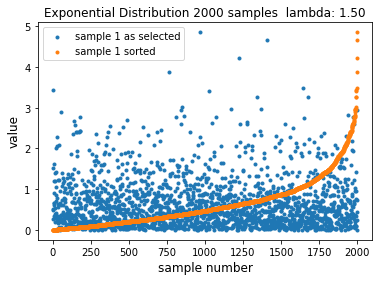

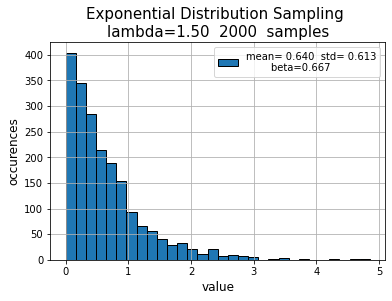

In [3]:
# sample an exponential distribution
from numpy.random import exponential
# define the distribution
lambda_val = 1.5
beta_val = 1 / lambda_val
n = 2000
nn = np.arange(0, n, 1)

# generate the sample
sample1 = exponential(beta_val, n)

# statistics function
# just to do the math - this is the same as:
# np.var(sample)
# np.mean(sample)
def sample_stat(sample):
    mean = sum(sample)/len(sample)
    dif_square_list = []
    for value in sample:
        dif_square = (mean - value)**2
        dif_square_list.append(dif_square)
    sum_squares = sum(dif_square_list)
    variance = sum_squares/(len(sample))
    return mean, variance

# statistics
mean1, variance1 = sample_stat(sample1)

# plot sample1
plt.scatter(nn, sample1, marker='.', label='sample 1 as selected')
plt.scatter(nn, sorted(sample1), marker='.', label='sample 1 sorted' \
            .format(min(sample1), max(sample1)))
plt.title('Exponential Distribution {} samples  lambda: {:.2f}'.format(n, lambda_val))
plt.xlabel('sample number', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.legend()
plt.savefig('expon_samples.svg')
plt.show();

#draw histogram
plt.hist(sample1, bins=30, ec='black', label='mean= {:.3f}  std= {:.3f}\n\
        beta={:.3f}'.format(mean1, math.sqrt(variance1), beta_val))
plt.title('Exponential Distribution Sampling \nlambda={:.2f}  {:}  samples'.format(lambda_val, n), fontsize=15)
plt.xlabel('value', fontsize=12)
plt.ylabel('occurences', fontsize=12)
plt.legend()
plt.grid()
plt.savefig('expon_hist.svg')
plt.show();